In [2]:
import sys
sys.path.append("../utils")

import cv2
import numpy as np

import matplotlib.pyplot as plt

from minimum_spanning_tree_prim import GraphUndirectedWeighted
from minimum_spanning_tree_prim import PrimMST

In [3]:
# Load sample image
'''
imsample = np.array([[0, 0, 1, 0, 0],
                     [0, 1, 4, 1, 0],
                     [1, 4, 6, 4, 1],
                     [0, 1, 4, 1, 0],
                     [0, 0, 1, 0, 0]])
'''
imsample = cv2.imread("../asset/cameraman.png")[..., 0].astype(np.float32)
imsample = (imsample - imsample.min())/(imsample.max() - imsample.min())
imsample = imsample[251:271, 251:271]

# Build undirected/weighted image graph
graph = GraphUndirectedWeighted(imsample)()

# Print results
#for k, v in graph.items():
#    print("Node => [%d]"%k, v)
#for node in nodes:
#    print("SortedWeighted Nodes", node)

In [4]:
def drawMSF(x, leaves):
    # Get input shape
    height, width = x.shape
    
    # Gray-scale
    gray = 255*(x - x.min())/(x.max() - x.min())

    # Define plot components
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

    # Plot MSF
    axes.imshow(gray, cmap="Greys")
    for leaf in leaves:
        # Mark leaf node
        xa, ya = leaf.index//width, leaf.index%width
        axes.scatter(ya, xa, color="Blue", s=20, marker="s")

        while leaf.parent:
            # Mark branch node
            a, b = leaf.parent.index, leaf.index
        
            xa, ya = a//width, a%width
            xb, yb = b//width, b%width
        
            axes.scatter(ya, xa, color="Red", s=20)
            axes.arrow(ya, xa, yb-ya, xb-xa, color="lime", head_width=.05, head_length=.1)

            # Upstream
            leaf = leaf.parent

            # Mark root node
            if leaf.parent == None:
                axes.scatter(ya, xa, color="Green", s=20, marker="D")

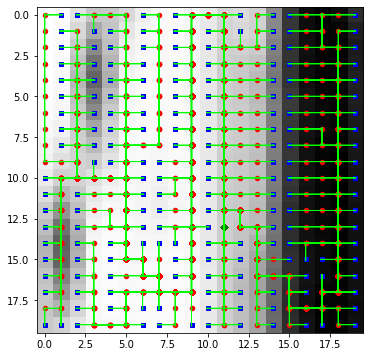

In [6]:
# Find minimum spanning tree with Prim's algorithm
leaves = PrimMST(graph)

# Draw MSF
drawMSF(imsample, leaves)